<a href="https://colab.research.google.com/github/CARC2806/TI3002C.101/blob/main/A00833458_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import skew, kurtosis
from scipy import stats

In [114]:
db = pd.read_excel('/content/drive/MyDrive/Lab2/Updated_Dataset.xlsx')

In [115]:
likert_maping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5,
    'Ni deacuerdo ni en desacuerdo': 3,
    'Neither Agree nor Disagree': 3
}

db.replace(likert_maping, inplace=True)


In [116]:
df = pd.DataFrame()
df['ID'] = db['ID']
df['Systematic_thinking'] = db.iloc[:, 9:15].mean(axis=1).round(1)
df['Scientific_thinking'] = db.iloc[:, 15:22].mean(axis=1).round(1)
df['Critical_thinking'] = db.iloc[:, 22:28].mean(axis=1).round(1)
df['Innovative_thinking'] = db.iloc[:, 28:].mean(axis=1).round(1)
df['Complex_thinking'] = df.iloc[:, 1:4].mean(axis=1).round(1)
df

,ID,Systematic_thinking,Scientific_thinking,Critical_thinking,Innovative_thinking,Complex_thinking
0,1,4.3,3.7,4.2,4.0,4.1
1,2,4.0,4.0,4.0,4.0,4.0
2,3,4.0,4.0,3.8,3.8,3.9
3,4,4.2,3.6,4.2,3.7,4.0
4,5,4.7,3.6,4.0,3.8,4.1
...,...,...,...,...,...,...
1153,1154,4.7,4.7,4.0,4.0,4.5
1154,1155,5.0,5.0,5.0,5.0,5.0
1155,1156,4.0,3.9,4.0,3.5,4.0
1156,1157,4.5,3.0,4.5,5.0,4.0


#1. Create a dot plot of systematic thinking, scientific thinking, critical thinking, innovative thinking, and complex thinking. To calculate the sub-competencies, make an average of all the corresponding questions given on the Likert Scale. Based on this graph, describe the distribution of sub-competencies of complex thinking, focusing on the center, shape, and spread of the distribution.

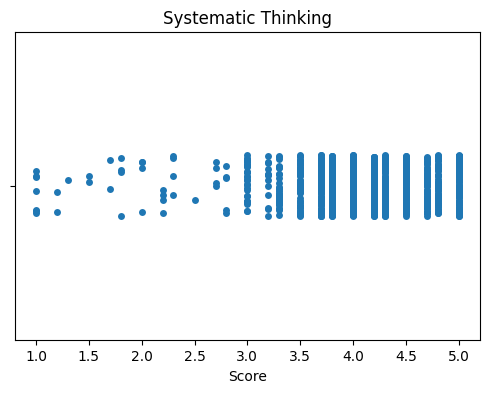

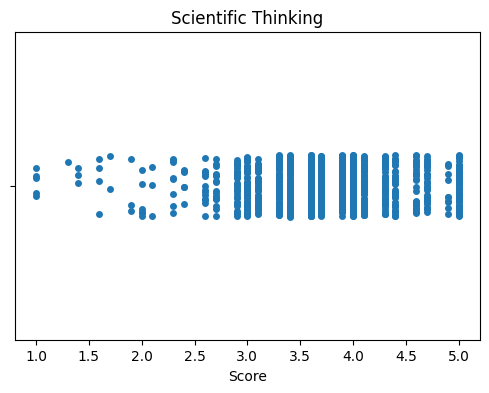

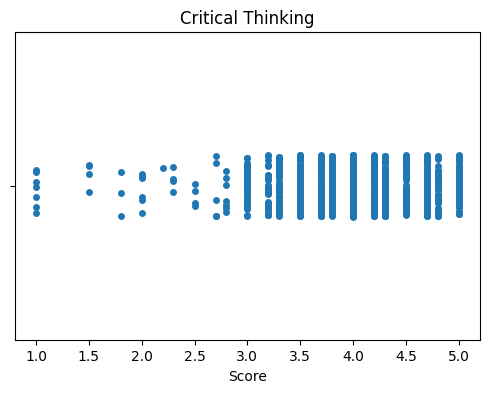

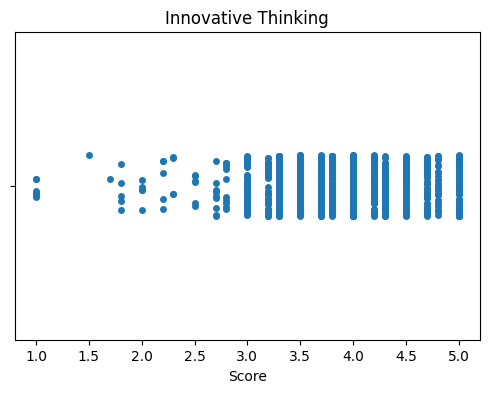

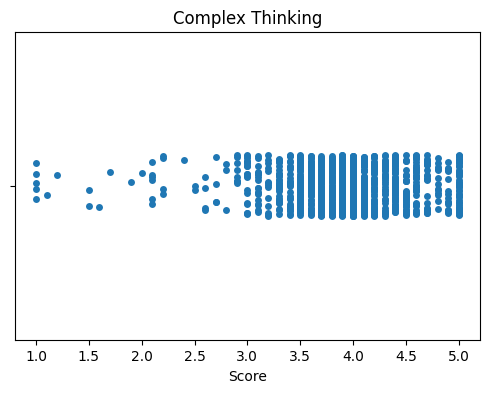

In [117]:
thinking_types = ['Systematic_thinking', 'Scientific_thinking', 'Critical_thinking', 'Innovative_thinking','Complex_thinking']
for thinking in thinking_types:
    plt.figure(figsize=(6, 4))

    sns.stripplot(x=thinking, data=df, jitter=True)


    plt.title(f'{thinking.replace("_", " ").title()}')

    plt.xlabel('Score')

    plt.show()

The data mostly falls between 3 and 5, making it clearly skewed to the right. Although the data is spread across the entire range for each thinking type, it generally leans towards the higher values

#2. Create a histogram for systematic thinking, scientific thinking, critical thinking, innovative thinking, and complex thinking using Sturges' law. Add a frequency polygon to each of these histograms. Answer the following questions: Does the histogram have a single prominent peak (unimodal), several peaks (bimodal/multimodal), or no apparent peaks (uniform)? Is the histogram right skewed, left skewed, or symmetric? Are there any unusual observations or potential outliers? Calculate the skewness and kurtosis for each sub-competency.

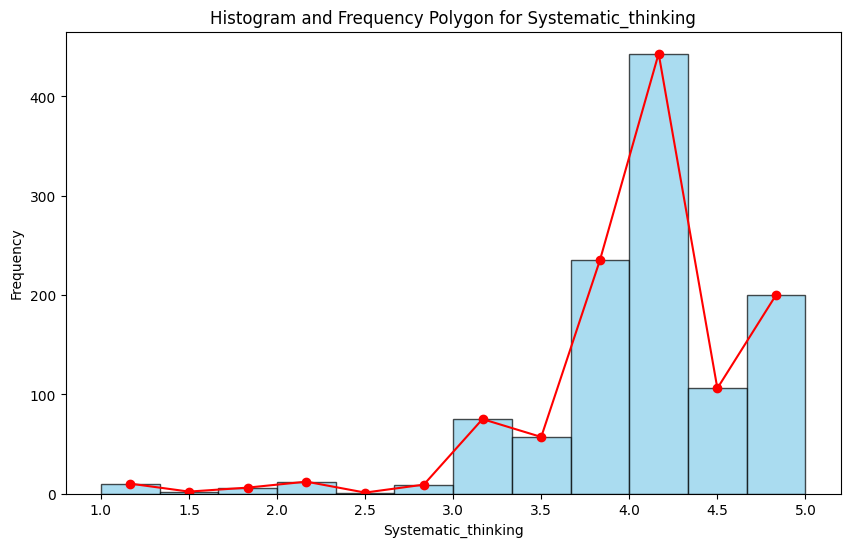

Skewness of Systematic_thinking: -1.48
Kurtosis of Systematic_thinking: 4.76
Shape Analysis: Left skewed, Leptokurtic (sharp peak)



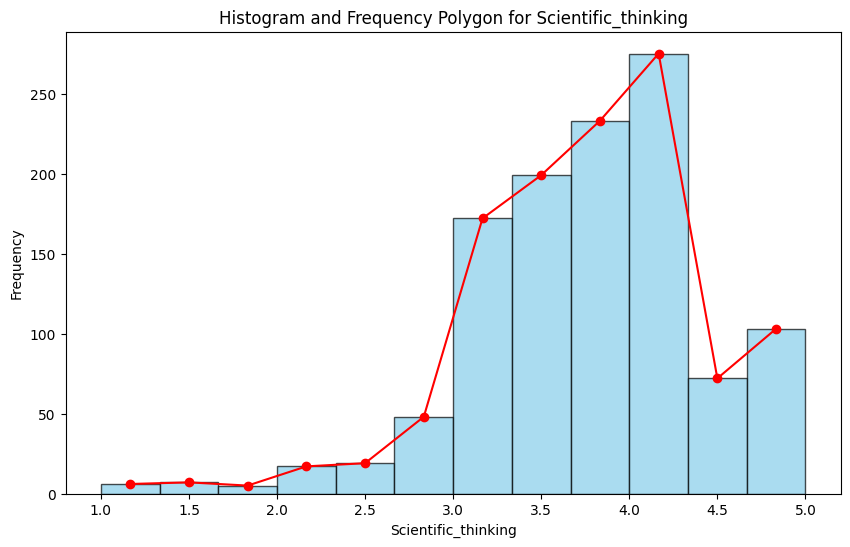

Skewness of Scientific_thinking: -0.61
Kurtosis of Scientific_thinking: 1.61
Shape Analysis: Left skewed, Platykurtic (flat peak)



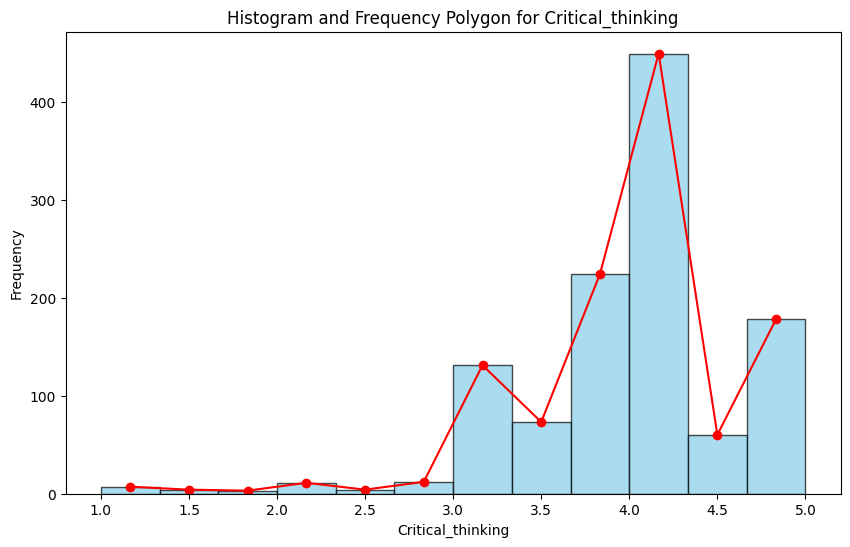

Skewness of Critical_thinking: -1.08
Kurtosis of Critical_thinking: 3.37
Shape Analysis: Left skewed, Leptokurtic (sharp peak)



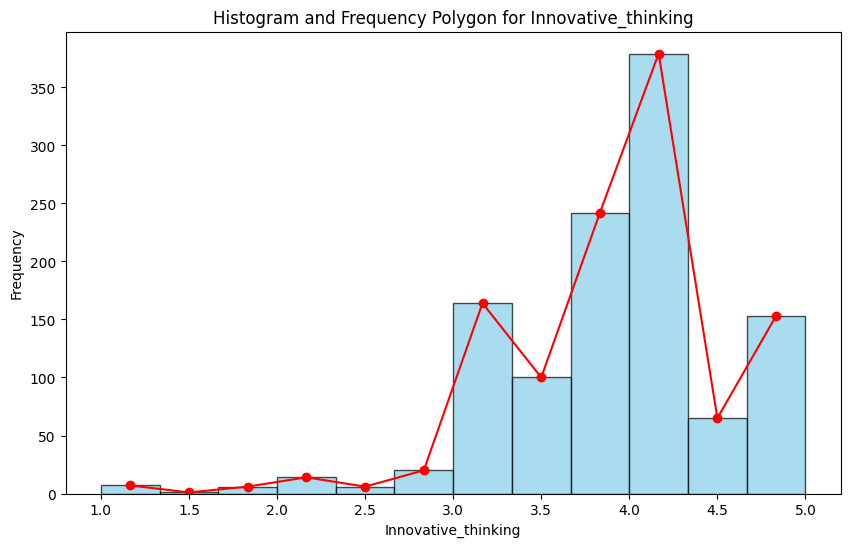

Skewness of Innovative_thinking: -0.81
Kurtosis of Innovative_thinking: 2.37
Shape Analysis: Left skewed, Platykurtic (flat peak)



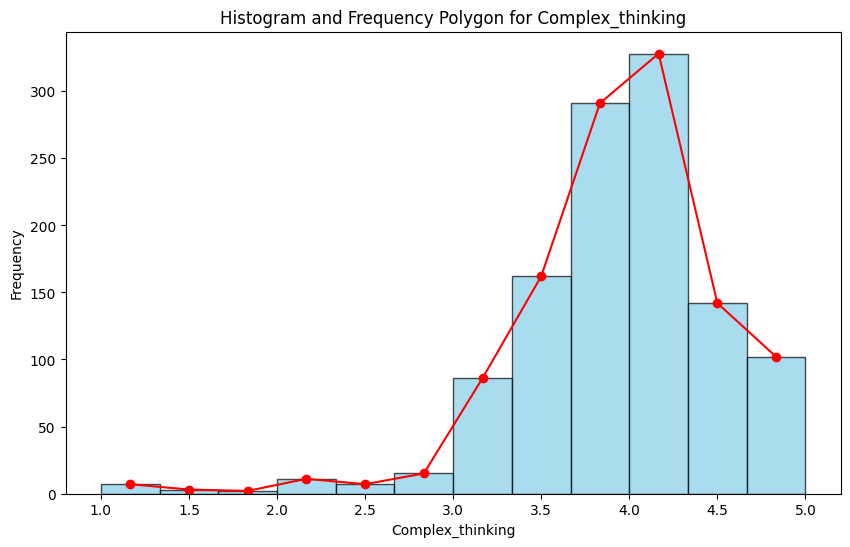

Skewness of Complex_thinking: -1.11
Kurtosis of Complex_thinking: 4.09
Shape Analysis: Left skewed, Leptokurtic (sharp peak)



In [118]:
def plot_histogram_with_polygon(data, title):
    plt.figure(figsize=(10, 6))


    counts, bin_edges, _ = plt.hist(data, bins='sturges', color='skyblue', edgecolor='black', alpha=0.7)


    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red')

    plt.title(f'Histogram and Frequency Polygon for {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()


    skewness = skew(data)
    kurt = kurtosis(data)

    print(f"Skewness of {title}: {skewness:.2f}")
    print(f"Kurtosis of {title}: {kurt:.2f}")


    if len(data) > 1:
        description = "Shape Analysis: "
        if skewness > 0:
            description += "Right skewed"
        elif skewness < 0:
            description += "Left skewed"
        else:
            description += "Symmetric"

        if kurt > 3:
            description += ", Leptokurtic (sharp peak)"
        elif kurt < 3:
            description += ", Platykurtic (flat peak)"
        else:
            description += ", Mesokurtic (normal peak)"

        print(description + "\n")


for column in ['Systematic_thinking', 'Scientific_thinking', 'Critical_thinking', 'Innovative_thinking', 'Complex_thinking']:
    plot_histogram_with_polygon(df[column].dropna(), column)

The histograms for each type of thinking show that the data generally clusters around higher scores, which means most people scored well in these areas. Each graph has a single noticeable peak, showing that most values are concentrated in one range. All the distributions are skewed to the left, meaning that the lower scores are less common, and the majority of people scored on the higher end. For the types of thinking like Systematic, Critical, and Complex, the data is more sharply focused around the peak, indicating many similar scores. Meanwhile, Scientific and Innovative Thinking have a flatter distribution, meaning the scores are more spread out. There are also some low scores, which might be unusual compared to the rest, but they are not very frequent in any of the graphs.

#3. Make a bar plot using a single categorical variable, gender, with respect to the perception of complex thinking. Based on this graph, what can you interpret about the relationship between gender and complex thinking perception?

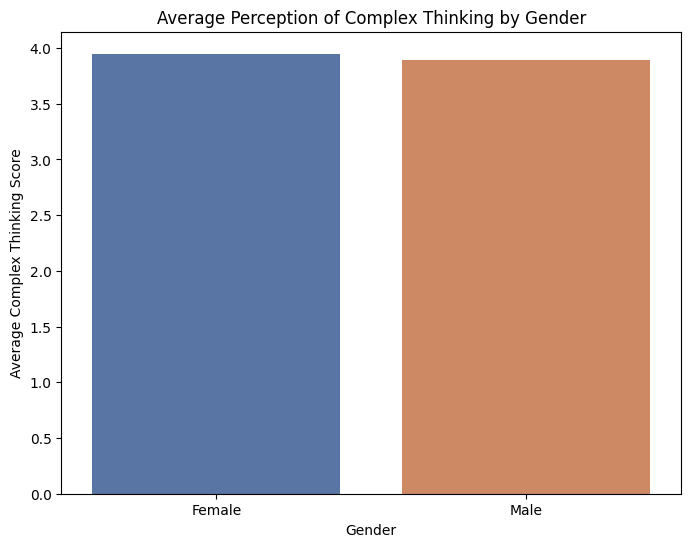

In [119]:
df['Gender'] = db['Gender'].map({'Man': 1, 'Women': 0})
gender_avg_complex = df.groupby('Gender')['Complex_thinking'].mean().reset_index()
gender_avg_complex['Gender'] = gender_avg_complex['Gender'].map({1: 'Male', 0: 'Female'})

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_avg_complex, x='Gender', y='Complex_thinking', palette='deep')

plt.title('Average Perception of Complex Thinking by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Complex Thinking Score')
plt.show()

Both females and males have very similar average scores when it comes to their perception of complex thinking. There isn't a big difference between the two genders, which suggests that both men and women tend to view their abilities in complex thinking in almost the same way. This means gender doesn't seem to have much impact on how people perceive their complex thinking skills in this case.

#4. Create a pie chart for each of the following variables: country of residence, discipline, level of education, institution, and occupation. Interpret the data represented in these graphs, describing the distribution of the qualitative variables.

In [120]:
df['Country of Residence'] = db['Country of Residence']
df['Discipline'] = db['Discipline']
df['Education Level'] = db['Education Level']
df['Institution'] = db['Institution']
df['Occupation'] = db['Occupation']

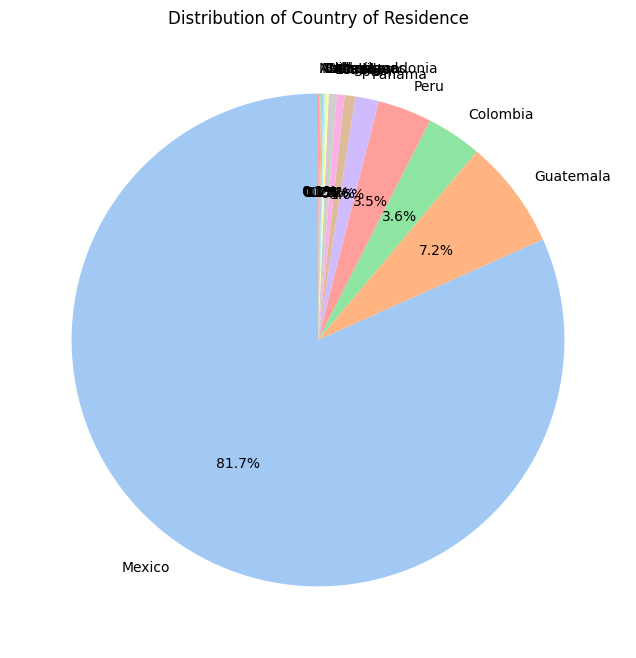

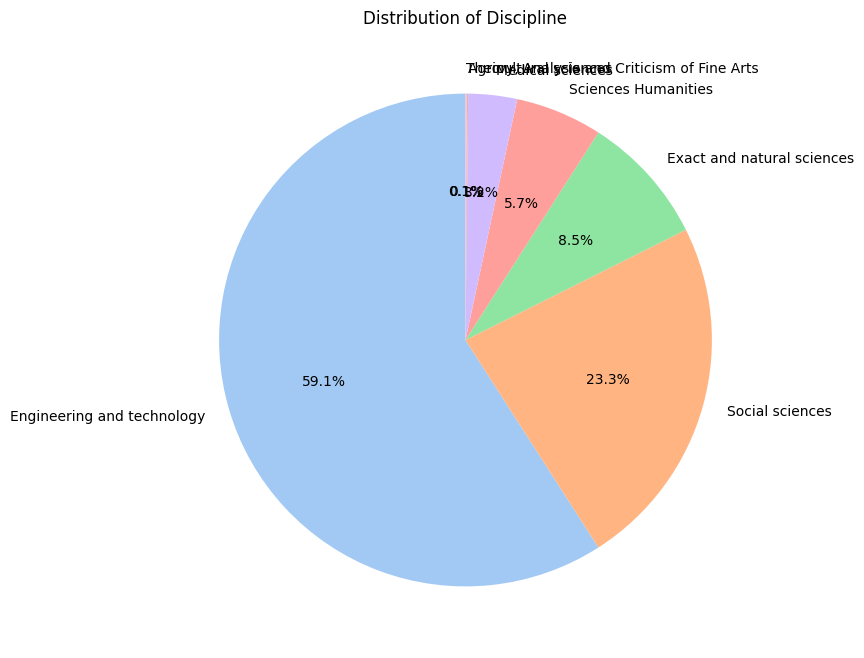

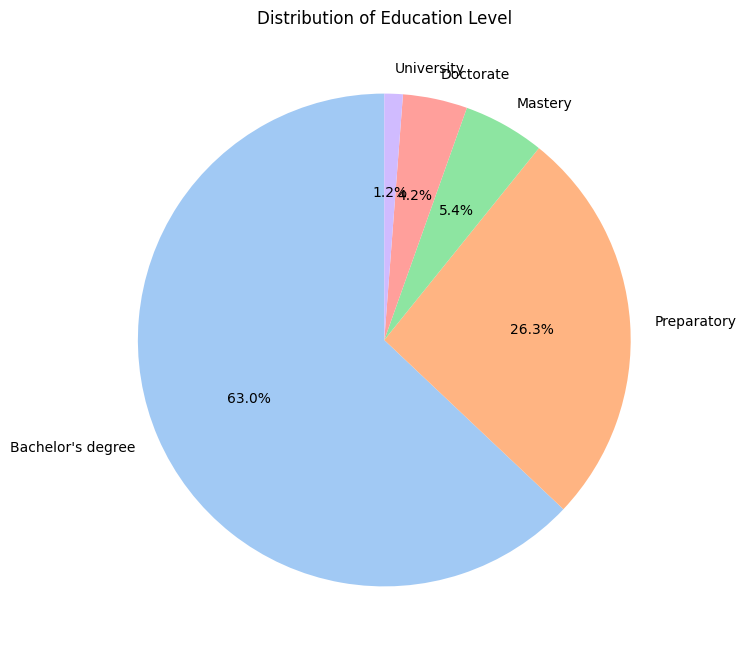

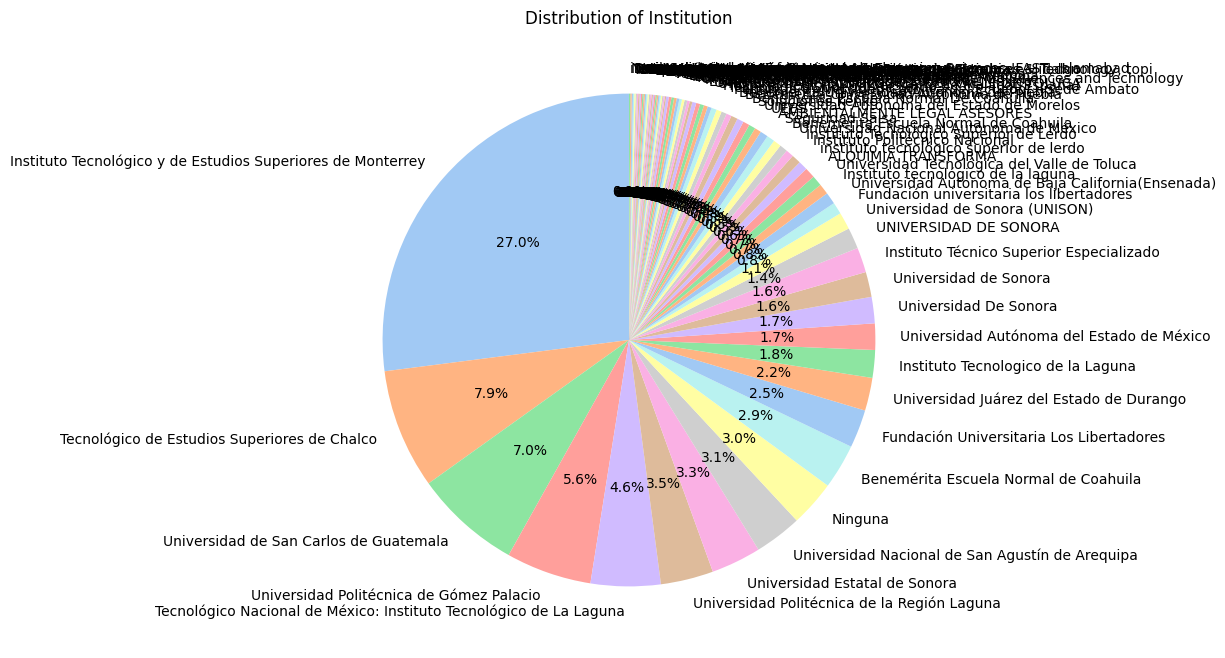

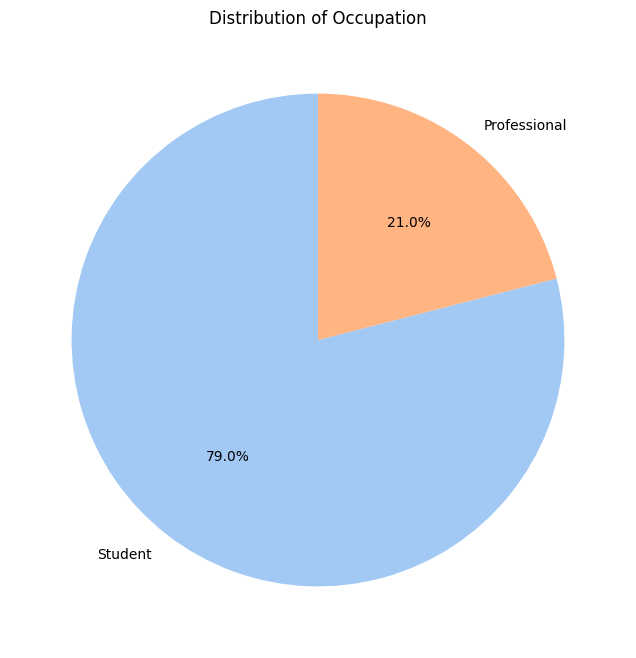

In [121]:
def plot_pie_chart(df, column, title):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(title)
    plt.ylabel('')
    plt.show()

plot_pie_chart(df, 'Country of Residence', 'Distribution of Country of Residence')
plot_pie_chart(df, 'Discipline', 'Distribution of Discipline')
plot_pie_chart(df, 'Education Level', 'Distribution of Education Level')
plot_pie_chart(df, 'Institution', 'Distribution of Institution')
plot_pie_chart(df, 'Occupation', 'Distribution of Occupation')

The pie charts show that most of the participants are from Mexico, making up 81.7% of the total. The rest are from other countries, but each of them represents only a small part of the whole. In terms of what people are studying, most are in engineering and technology, which makes up 59.1%, followed by social sciences with 23.3%. Other fields, like fine arts and natural sciences, are much less represented. Looking at education level, 63% of the participants have a bachelor's degree, while 26.3% are still in high school. There are also a few people with master's or doctoral degrees. Most of the participants come from the "Instituto Tecnológico y de Estudios Superiores de Monterrey," while many other institutions have only a few participants, making the chart quite cluttered. Finally, 79% of the participants are students, while 21% are professionals. Overall, it seems the survey mostly reached students from Mexico studying engineering or social sciences, with many coming from the same institution.

#5. Check the assumption of normality for the variables systematic thinking, scientific thinking, critical thinking, innovative thinking, and complex thinking using a Q-Q plot. Build a Q-Q plot for each dataset using the "probplot" function from scipy.stats. Compare these plots with a Q-Q plot generated from random numbers drawn from a normal distribution. How closely do the points follow the line? Does the data appear to be normally distributed?

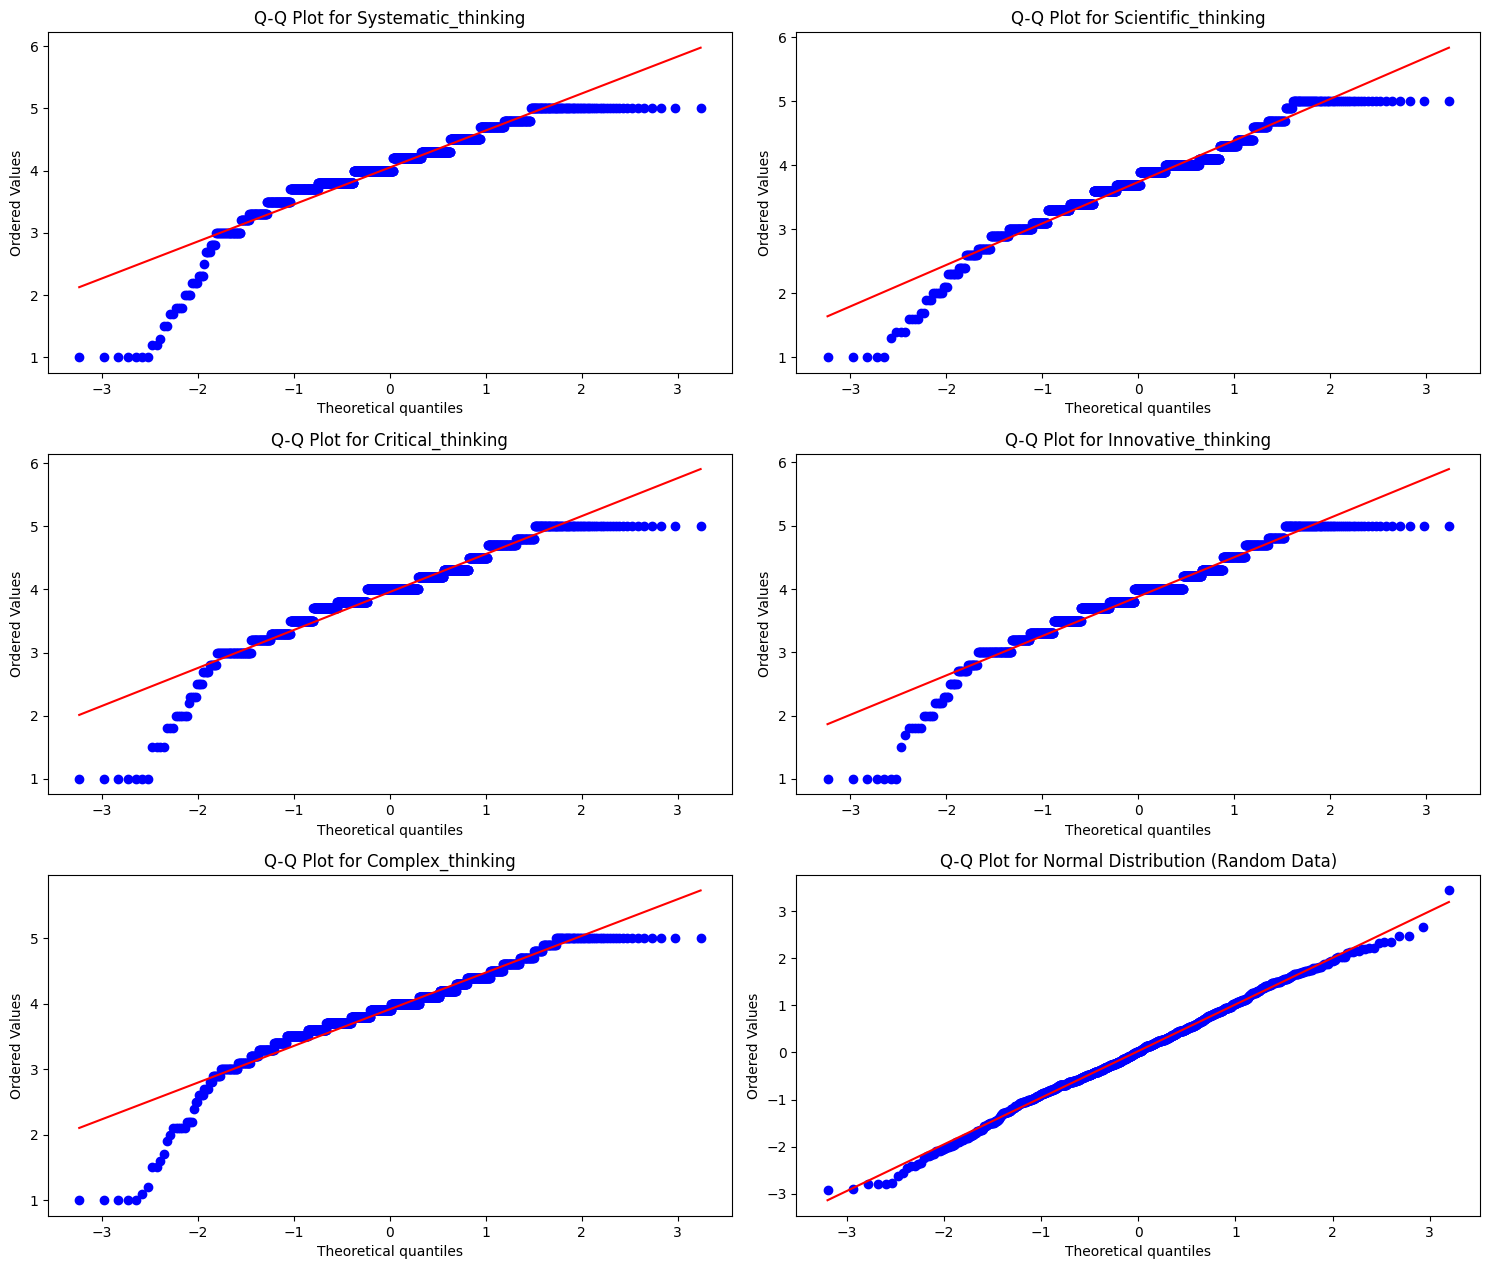

In [122]:
def plot_qq(df, columns):
    plt.figure(figsize=(15, 25))

    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns) + 1, 2, i)
        stats.probplot(df[column].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {column}')

    plt.subplot(len(columns) + 1, 2, len(columns) + 1)
    normal_data = np.random.normal(0, 1, 1000)
    stats.probplot(normal_data, dist="norm", plot=plt)
    plt.title('Q-Q Plot for Normal Distribution (Random Data)')

    plt.tight_layout()
    plt.show()

columns = [
    'Systematic_thinking',
    'Scientific_thinking',
    'Critical_thinking',
    'Innovative_thinking',
    'Complex_thinking'
]

plot_qq(df, columns)

The Q-Q plots for the thinking variables show that the points deviate significantly from the red line, especially at the ends, which means the data isn't normally distributed. Unlike the random normal data plot, where the points follow the line closely, these plots show curves, indicating that the data has some skewness or heavy tails. Overall, the data doesn't fit the pattern expected for a normal distribution.

#6. Make a scatter plot matrix for systematic thinking, scientific thinking, critical thinking, innovative thinking, and complex thinking, using gender as the hue. What do you interpret from this scatter plot matrix? Are there any differences in the perception of complex thinking with respect to gender?

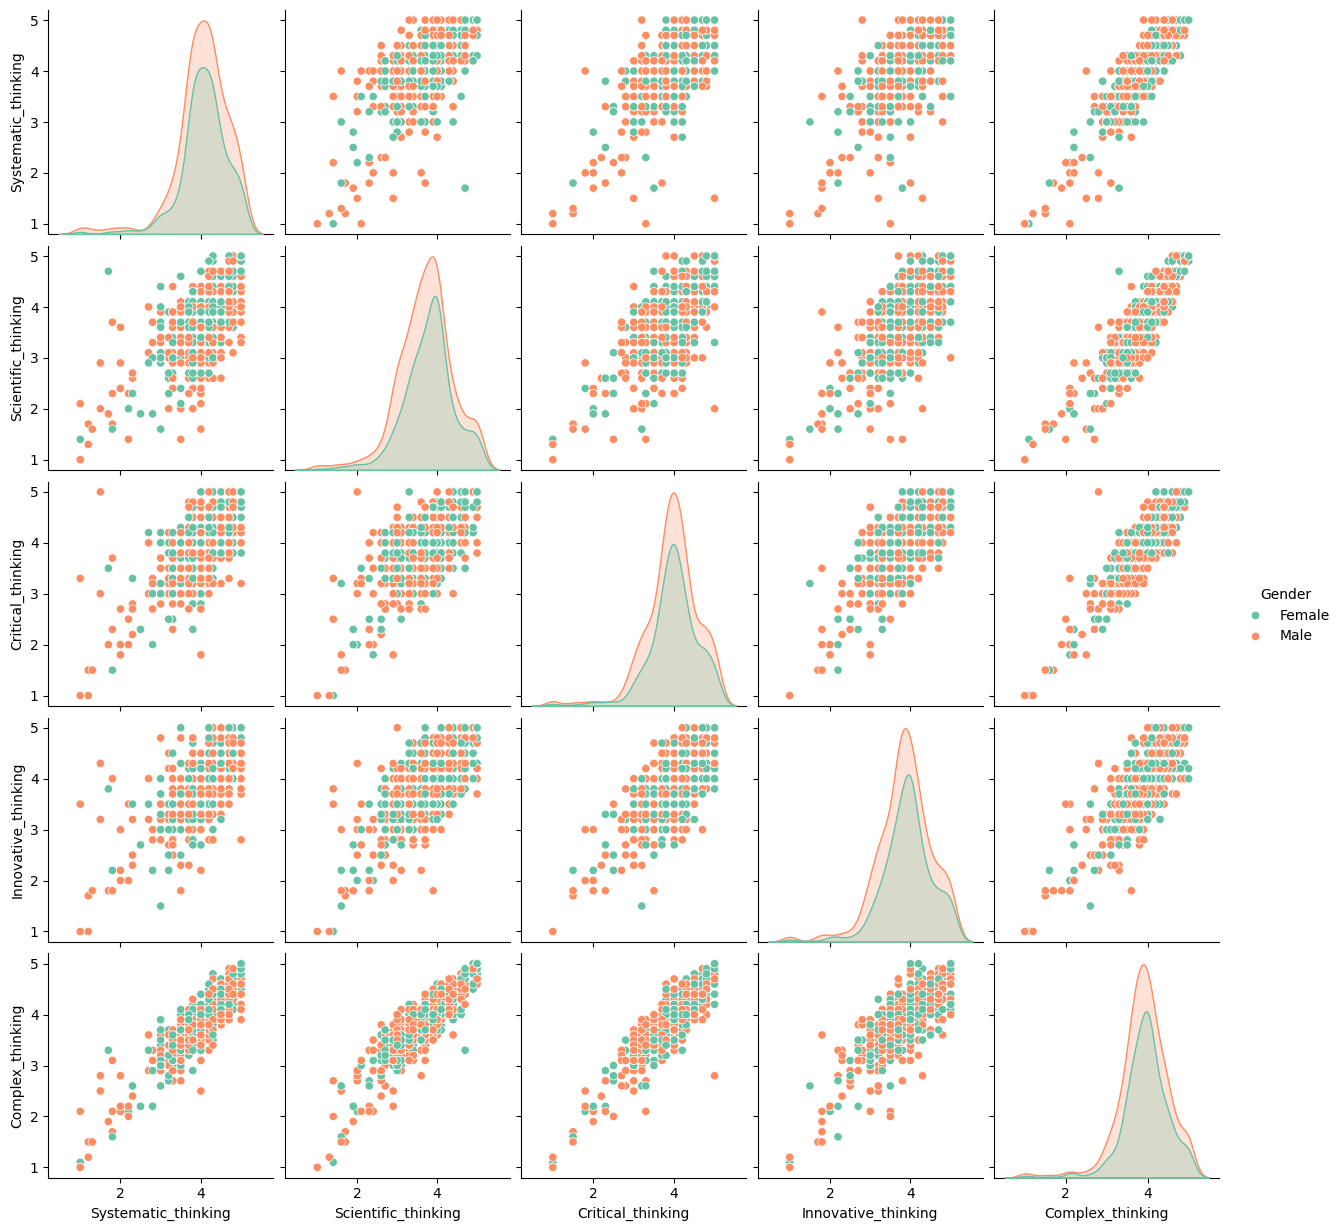

In [123]:
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
sns.pairplot(df, vars=['Systematic_thinking', 'Scientific_thinking', 'Critical_thinking', 'Innovative_thinking', 'Complex_thinking'], hue='Gender', palette='Set2')
plt.show()

The scatter plot matrix shows that the data points for males and females are mixed quite evenly across all the variables, including complex thinking. There isn't a clear separation between the two genders, indicating that there are no strong differences in the perception of complex thinking between males and females. Both genders have similar distributions, and their points overlap significantly, suggesting that the levels of different types of thinking are quite similar regardless of gender.

#7. Create a box plot with an overlaying swarm plot for all indicators: systematic thinking, scientific thinking, critical thinking, innovative thinking, and complex thinking. Then, create a violin plot for the same indicators. Compare the differences between the box plot and the violin plot. What different interpretations can you make from each graph?

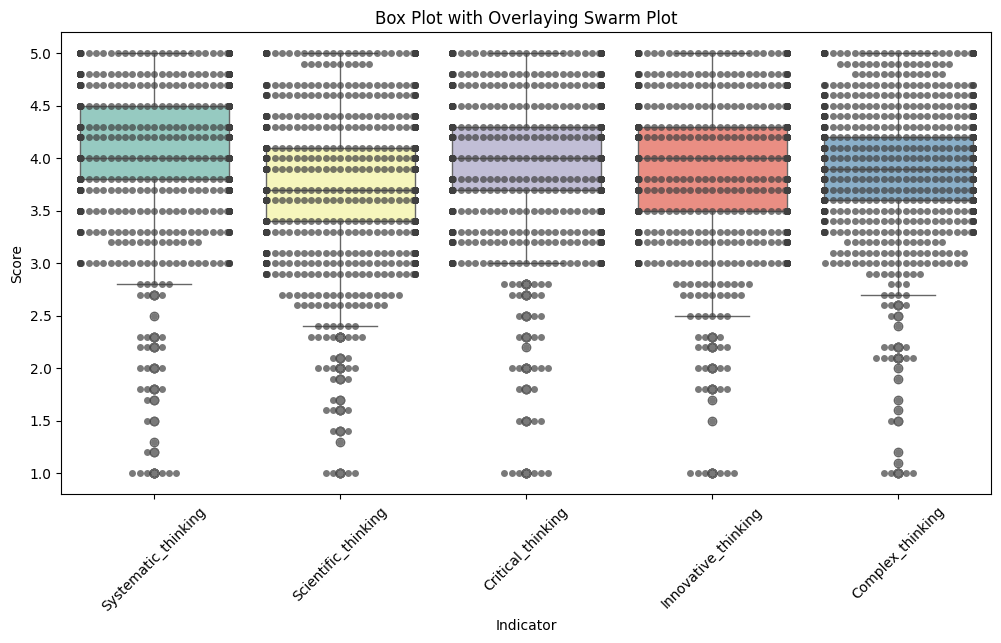

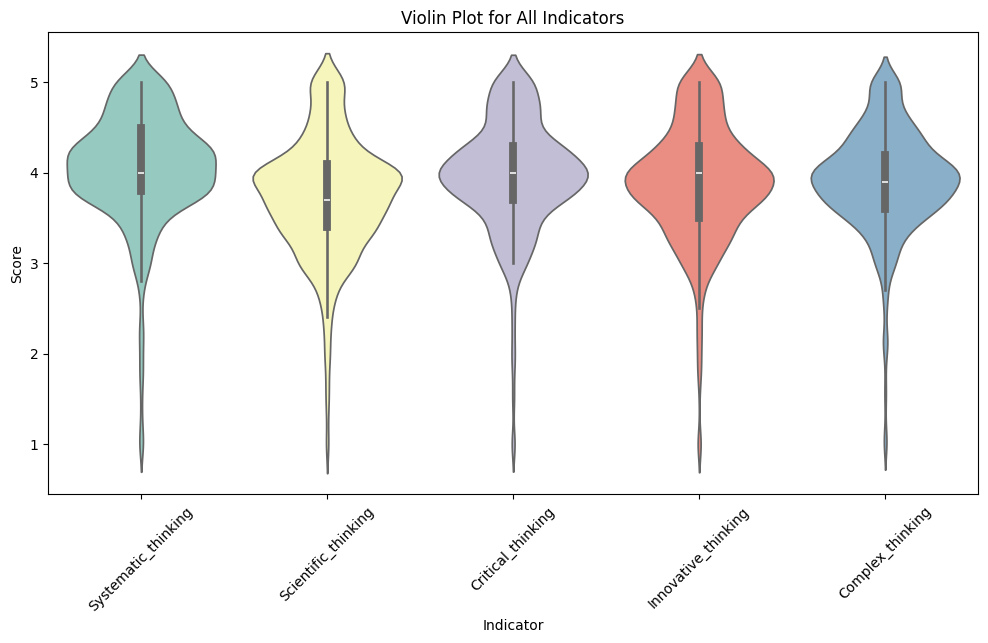

In [124]:
df_melted = df.melt(value_vars=['Systematic_thinking', 'Scientific_thinking', 'Critical_thinking', 'Innovative_thinking', 'Complex_thinking'],
                    var_name='Indicator', value_name='Score')
# Box Plot with Swarm Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Indicator', y='Score', data=df_melted, palette='Set3')
sns.swarmplot(x='Indicator', y='Score', data=df_melted, color='.25', alpha=0.7)
plt.title('Box Plot with Overlaying Swarm Plot')
plt.xticks(rotation=45)
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Indicator', y='Score', data=df_melted, palette='Set3')
plt.title('Violin Plot for All Indicators')
plt.xticks(rotation=45)
plt.show()

The box plot with the swarm plot shows the median and range of scores for each type of thinking, while the swarm plot adds individual data points, making it easy to see clusters and outliers. The violin plot, on the other hand, shows the overall shape of the data distribution, including where the scores are more common. From the violin plot, we can see that most scores are around 4, with fewer scores at the lower end. The main difference is that the box plot is better for seeing summary statistics and individual points, while the violin plot helps understand how the data is spread out and if there are patterns in the distribution. Both plots show that the scores for all indicators are generally high and similar across the different types of thinking.